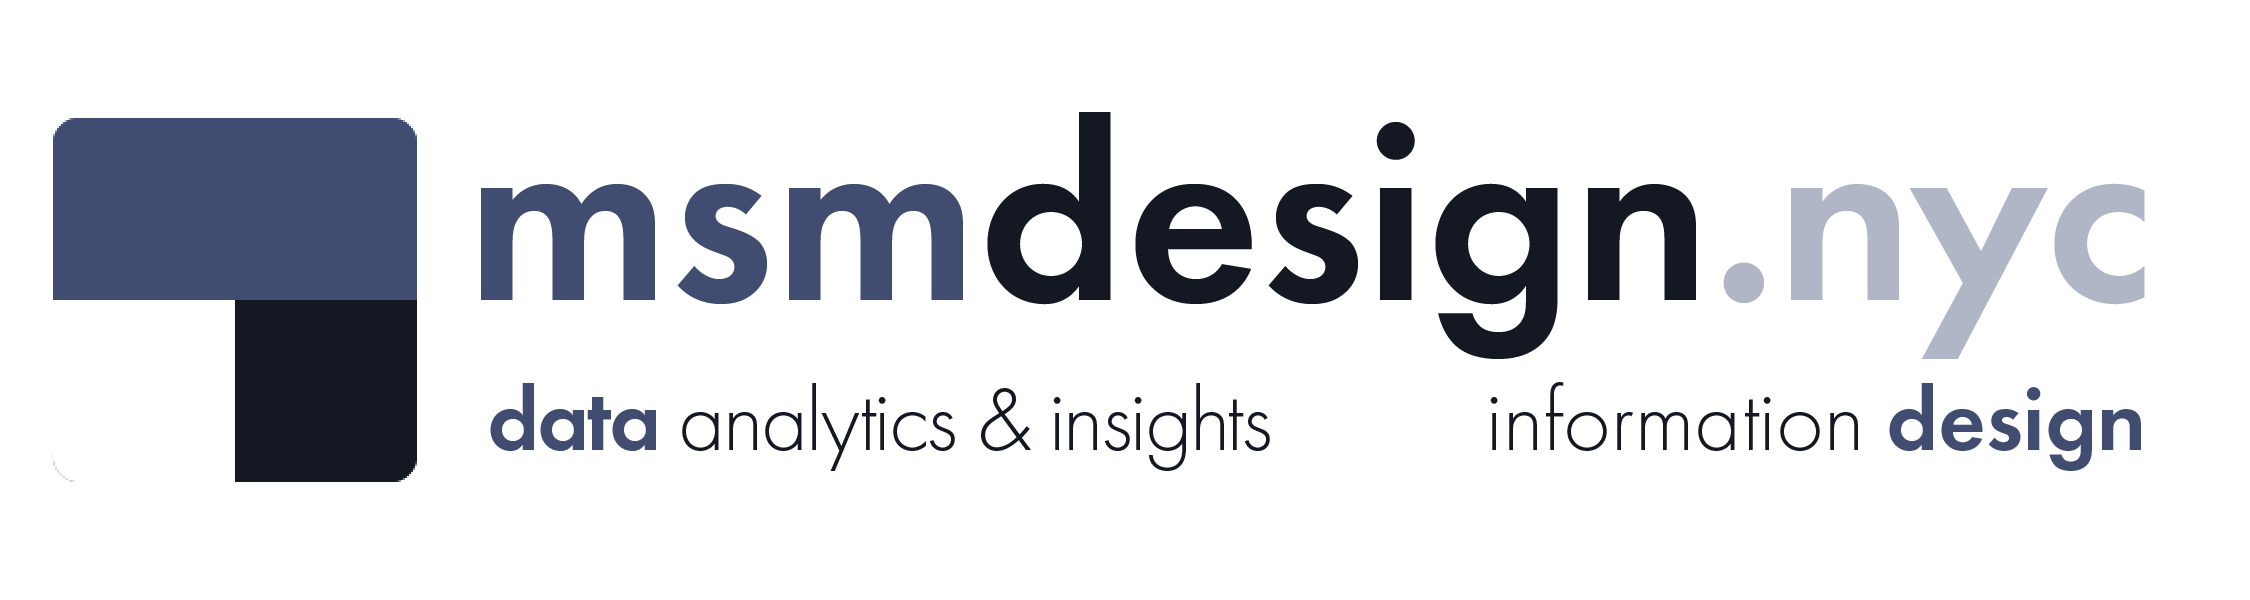

---
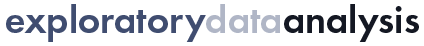

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# 2022 Open Data Plan: Completed Civic Engagements

**Dataset Analyzed:** *2022 Open Data Plan: Completed Civic Engagements*

**About This Dataset:** Civic engagement activities agencies completed between September 15, 2021 and April 30, 2022. Data provided by the Office of Technology and Innovation (OTI), City of New York: https://data.cityofnewyork.us/City-Government/2022-Open-Data-Plan-Completed-Civic-Engagements/562y-zfbr



**Acknowledgements:** NYC Open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-012


**EDA Publication Date:** Friday, March 17, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [3]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='viridis',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [4]:
%%html
<style>
table {float:left}
</style>

### 0.4 Display all rows of output by default

In [5]:
pd.set_option('display.max_rows', None)

# to reset:
# pd.reset_option('display.max_rows')

### 0.5 Format large numbers and display floating point values to two decimal places

In [6]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

# to reset:
# pd.reset_option('display.float_format')

### 0.6 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [42]:
# load the data from a csv file (stored locally) into a new DataFrame object

path = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-012\data\2022_Open_Data_Plan__Completed_Civic_Engagements.csv"

engagements = pd.read_csv(path, encoding='utf-8')

In [8]:
# glimpse the first three rows

engagements.head(3)

,Agency Name,Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.,Digital Amplification - Advertised NYC Open Data on your Agency’s website.,Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.,Digital Amplification - Tweeted whenever a new Open Data asset is published.,Event Engagement - Produced a curriculum to be used to engage an audience around your agency’s Open Data assets at a public event,"Event Engagement - Produced your own event to discuss your Agency’s Open Data assets (this could be a 1 hour workshop, a 24 hour hackathon, or something else.)",Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.,Public Speaking - Presented about your agency’s open data assets in an academic or school environment,Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.,...,Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets,Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.,Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency.,Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.,Storytelling - Published a blog post about your Agency’s Open Data assets,Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.,"User-centered research - Developed and convened a focus group or advisory council of users of your Agency’s Open Data to learn more about how they use your data assets, and to request feedback.",User-centered research - Engaged a professional (internally or externally) to develop user personas and better engage your users.,Other civic engagement activity not listed,Public Statement
0,Administration for Children's Services (ACS),0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,Board of Standards and Appeals (BSA),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,Business Integrity Commission (BIC),0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [10]:
# glimpse the last three rows

engagements.tail(3)

,Agency Name,Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.,Digital Amplification - Advertised NYC Open Data on your Agency’s website.,Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.,Digital Amplification - Tweeted whenever a new Open Data asset is published.,Event Engagement - Produced a curriculum to be used to engage an audience around your agency’s Open Data assets at a public event,"Event Engagement - Produced your own event to discuss your Agency’s Open Data assets (this could be a 1 hour workshop, a 24 hour hackathon, or something else.)",Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.,Public Speaking - Presented about your agency’s open data assets in an academic or school environment,Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.,...,Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets,Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.,Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency.,Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.,Storytelling - Published a blog post about your Agency’s Open Data assets,Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.,"User-centered research - Developed and convened a focus group or advisory council of users of your Agency’s Open Data to learn more about how they use your data assets, and to request feedback.",User-centered research - Engaged a professional (internally or externally) to develop user personas and better engage your users.,Other civic engagement activity not listed,Public Statement
68,School Construction Authority (SCA),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
69,Staten Island Borough President's Office (BPSI),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
70,Taxi and Limousine Commission (TLC),0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,A high school student presented her research t...


In [69]:
# glimpse ten randomly selected rows

engagements.sample(10, random_state=72)

,Agency Name,Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.,Digital Amplification - Advertised NYC Open Data on your Agency’s website.,Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.,Digital Amplification - Tweeted whenever a new Open Data asset is published.,Event Engagement - Produced a curriculum to be used to engage an audience around your agency’s Open Data assets at a public event,"Event Engagement - Produced your own event to discuss your Agency’s Open Data assets (this could be a 1 hour workshop, a 24 hour hackathon, or something else.)",Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.,Public Speaking - Presented about your agency’s open data assets in an academic or school environment,Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.,...,Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets,Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.,Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency.,Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.,Storytelling - Published a blog post about your Agency’s Open Data assets,Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.,"User-centered research - Developed and convened a focus group or advisory council of users of your Agency’s Open Data to learn more about how they use your data assets, and to request feedback.",User-centered research - Engaged a professional (internally or externally) to develop user personas and better engage your users.,Other civic engagement activity not listed,Public Statement
61,Office of Collective Bargaining (OCB),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,City Clerk's Office,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
43,Mayor's Office for International Affairs,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
51,Mayor's Office of Media and Entertainment (MOME),0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27,Department of Records and Information Services...,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
50,Mayor's Office of Food Policy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The Mayor's Office of Food Policy does not hav...
59,Office of Administrative Trials and Hearings (...,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
47,Mayor's Office of Contract Services (MOCS),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN
14,Department of Citywide Administrative Services...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,DCAS links to our Open Datasets from our webpa...
5,City Council (NYCC),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The New York City Council continued its oversi...


**The data has been loaded and has been read in as expected.**

### 0.7. Check the data type of each column

In [43]:
# display a listing of each of the DataFrame's columns 

list(engagements.columns)

['Agency Name',
 'Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.',
 'Digital Amplification - Advertised NYC Open Data on your Agency’s website.',
 'Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.',
 'Digital Amplification - Tweeted whenever a new Open Data asset is published.',
 'Event Engagement - Produced a curriculum to be used to engage an audience around your agency’s Open Data assets at a public event',
 'Event Engagement - Produced your own event to discuss your Agency’s Open Data assets (this could be a 1 hour workshop, a 24 hour hackathon, or something else.)',
 'Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.',
 'Public Speaking - Presented about your agency’s open data assets in an academic or school environment',
 'Public Speaking - Shared Open Data swag and informationa

In [44]:
# display a listing of each of the DataFrame's datatypes

engagements.dtypes

Agency Name                                                                                                                                                                                          object
Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.                                                                                               int64
Digital Amplification - Advertised NYC Open Data on your Agency’s website.                                                                                                                            int64
Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.                                                                                              int64
Digital Amplification - Tweeted whenever a new Open Data asset is published.                                                                                                            

### 0.8 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/562y-zfbr/files/86190d1c-d959-43a5-9237-d5181a40492b?download=true&filename=NYC_Open_Data_Plan_Civic_Engagements_Data_Dictionary.xlsx) and make sure that our DataFrame's data types match the source data. 

---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our dataset?

In [45]:
# display the number of rows and columns in the DataFrame

rows = engagements.shape[0]
columns = engagements.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 71 rows and 21 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [46]:
# display the index of the DataFrame

engagements.index

RangeIndex(start=0, stop=71, step=1)

Our DataFrame has an integer index. We know from the data dictionary that each row is an NYC agency.

### 1.3 How many null values are in each column?

In [47]:
# display the number of missing values in each column of the DataFrame

engagements.isna().sum()

Agency Name                                                                                                                                                                                           0
Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.                                                                                               0
Digital Amplification - Advertised NYC Open Data on your Agency’s website.                                                                                                                            0
Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.                                                                                              0
Digital Amplification - Tweeted whenever a new Open Data asset is published.                                                                                                                          0


### 1.4 How many unique values are there in each column?

In [29]:
# display the count of unique elements in each column

engagements.nunique(axis=0, dropna=True)

Agency Name                                                                                                                                                                                          71
Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.                                                                                               2
Digital Amplification - Advertised NYC Open Data on your Agency’s website.                                                                                                                            2
Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.                                                                                              2
Digital Amplification - Tweeted whenever a new Open Data asset is published.                                                                                                                          2


---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Find the proportion of NYC agencies that met each of of the engagement criteria listed

**Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.**

In [50]:
engagements['Communication Engagement - Advertised Agency data in a public email newsletter at least twice per year.'].mean()

0.014084507042253521

**Digital Amplification - Advertised NYC Open Data on your Agency’s website.**

In [51]:
engagements[ 'Digital Amplification - Advertised NYC Open Data on your Agency’s website.'].mean()

0.28169014084507044

**Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.**

In [52]:
engagements['Digital Amplification - Sent at least one tweet per month about your Agency’s existing Open Data assets.'].mean()

0.11267605633802817

**Digital Amplification - Tweeted whenever a new Open Data asset is published.**

In [53]:
engagements['Digital Amplification - Tweeted whenever a new Open Data asset is published.'].mean()

0.2535211267605634

**Event Engagement - Produced a curriculum to be used to engage an audience around your agency’s Open Data assets at a public event**

In [70]:
engagements['Event Engagement - Produced a curriculum to be used to engage an audience around your agency’s Open Data assets at a public event'].mean()

0.014084507042253521

**Event Engagement - Produced your own event to discuss your Agency’s Open Data assets (this could be a 1 hour workshop, a 24 hour hackathon, or something else.**

In [55]:
engagements['Event Engagement - Produced your own event to discuss your Agency’s Open Data assets (this could be a 1 hour workshop, a 24 hour hackathon, or something else.)'].mean()

0.028169014084507043

**Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.**

In [56]:
engagements['Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.'].mean()

0.16901408450704225

**Public Speaking - Presented about your agency’s open data assets in an academic or school environment**

In [57]:
engagements['Public Speaking - Presented about your agency’s open data assets in an academic or school environment'].mean()

0.09859154929577464

**Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.**

In [58]:
engagements['Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.'].mean()

0.0

**Public Speaking - Spoke at a partner’s event (in NYC) about your Agency’s Open Data assets. (e.g., Community Boards)**

In [59]:
engagements['Public Speaking - Spoke at a partner’s event (in NYC) about your Agency’s Open Data assets. (e.g., Community Boards)'].mean()

0.16901408450704225

**Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets**

In [60]:
engagements['Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets'].mean()

0.028169014084507043

**Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.**

In [61]:
engagements['Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.'].mean()

0.014084507042253521

**Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency**

In [62]:
engagements['Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency.'].mean()

0.014084507042253521

**Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.**

In [63]:
engagements['Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.'].mean()

0.09859154929577464

**Storytelling - Published a blog post about your Agency’s Open Data assets**

In [64]:
engagements['Storytelling - Published a blog post about your Agency’s Open Data assets'].mean()

0.04225352112676056

**Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.**

In [65]:
engagements['Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.'].mean()

0.014084507042253521

**User-centered research - Developed and convened a focus group or advisory council of users of your Agency’s Open Data to learn more about how they use your data assets, and to request feedback.**

In [66]:
engagements['User-centered research - Developed and convened a focus group or advisory council of users of your Agency’s Open Data to learn more about how they use your data assets, and to request feedback.'].mean()

0.0

**User-centered research - Engaged a professional (internally or externally) to develop user personas and better engage your users.**

In [67]:
engagements['User-centered research - Engaged a professional (internally or externally) to develop user personas and better engage your users.'].mean()

0.014084507042253521

**Other civic engagement activity not listed**

In [68]:
engagements['Other civic engagement activity not listed'].mean()

0.04225352112676056

---

## **3. Prepare the dataset for export into external data visualization software**

In [72]:
# make a list of columns to be used in the visualization

viz_cols = ['Agency Name',
    'Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.',
 'Public Speaking - Presented about your agency’s open data assets in an academic or school environment',
 'Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.',
 'Public Speaking - Spoke at a partner’s event (in NYC) about your Agency’s Open Data assets. (e.g., Community Boards)',
 'Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets',
 'Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.',
 'Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency.',
 'Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.',
 'Storytelling - Published a blog post about your Agency’s Open Data assets',
 'Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.']

In [74]:
# create a new dataframe considting only of the columns to be used to create the visualizations

viz_df = engagements[viz_cols].copy()

In [77]:
# glimpse

viz_df.sample(10, random_state=16)

,Agency Name,Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.,Public Speaking - Presented about your agency’s open data assets in an academic or school environment,Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.,"Public Speaking - Spoke at a partner’s event (in NYC) about your Agency’s Open Data assets. (e.g., Community Boards)",Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets,Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.,Storytelling - Included your Agency’s Open Data commitments in a report published by your Agency.,Storytelling - Posted about your Agency’s Open Data assets on your Agency’s Facebook or LinkedIn channels.,Storytelling - Published a blog post about your Agency’s Open Data assets,Storytelling - Published a video describing your Agency’s data assets or a recent data asset release.
54,NYC Advisory Committee on the Judiciary,0,0,0,0,0,0,0,0,0,0
2,Business Integrity Commission (BIC),0,0,0,0,0,0,0,0,0,0
5,City Council (NYCC),0,0,0,0,0,0,0,0,0,0
22,Department of Health and Mental Hygiene (DOHMH),0,0,0,0,0,0,0,0,0,0
48,Mayor's Office of Criminal Justice (MOCJ),0,0,0,0,0,0,0,0,0,0
50,Mayor's Office of Food Policy,0,0,0,0,0,0,0,0,0,0
66,Police Department (NYPD),1,4,0,1,0,0,0,0,0,0
49,Mayor's Office of Environmental Remediation (OER),1,0,0,0,0,1,0,0,0,0
19,Department of Education (DOE),0,0,0,0,0,0,0,0,0,0
26,Department of Probation (DOP),0,0,0,0,0,0,0,0,0,0


In [80]:
# find the mean (proportion) of each column

viz_df.mean(numeric_only=True)

Public Speaking - Identified someone from your Agency to speak about your Agency’s Open Data assets at an event as a part of Open Data Week.                            0.17
Public Speaking - Presented about your agency’s open data assets in an academic or school environment                                                                   0.10
Public Speaking - Shared Open Data swag and informational one-pager with your community engagement liaisons to share at your Agency’s existing community touchpoints.   0.00
Public Speaking - Spoke at a partner’s event (in NYC) about your Agency’s Open Data assets. (e.g., Community Boards)                                                    0.17
Public Speaking - Spoke at an event hosted by your agency about your agency’s open data assets                                                                          0.03
Storytelling - Added a project made by your Agency to the NYC Open Data Project Gallery.                                               

In [83]:
# export to csv

export_df = viz_df.mean(numeric_only=True)

export_df.to_csv('export_df.csv')

---

---